# Notebook

In the EDA step, the prepared datasets from [1_Data_Prep](https://github.com/Rudinius/Bike_usage_Bremen/blob/4f39d66836e0585770c37d1cf261b0c0dd95101f/1_Data_Prep.ipynb) are loaded. The data is then further explored and analyzed for deeper understandung and imputing of data.

<a name="content"></a>
# Content

* [1. Import libraries](#1)
* [2. Import processed datasets](#2)
* [4. Details full dataset](#4)
  * [4.3. Overall trend and distribution](#4.3.)
  * [4.2. Counting stations in detail](#4.2.)
  * [4.3. Dependency on day of the week](#4.3.)
  * [4.4. Frequency of data/ periodic components](#4.4.)
  * [4.5. Data cleaning](#4.5.)
* [5. Details weather dataset](#5)
    * [5.1. Missing data](#5.1.)
    * [5.2. Data cleaning](#5.2.)
* [6. Correlation between datasets](#6)
  * [6.1. Correlation of weather features](#6.1.)
  * [6.2. Correlation cyclist and weather dataset](#6.2.)
  * [6.3. Correlation cyclist and holiday dataset](#6.3.)
  * [6.4. Correlation cyclist and vacation dataset](#6.4.)
* [7. Locations of counting stations](#7)
* [8. Export of training dataset](#8)
* [9. Summary and next steps](#9)

<a name="1"></a>
# 1.&nbsp;Import libraries

[Content](#content)

In [2]:
# Import libraries
from datetime import datetime
#import ipywidgets as widgets
from ipywidgets import interact, widgets
import numpy as np
import pandas as pd
from scipy.stats import norm
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from google.colab import files

In [3]:
# Install package ipyleaflet since it is not part of the standard packages
# of Google Colab

import importlib

# Check if package is installed
package_name = "ipyleaflet"
spec = importlib.util.find_spec(package_name)
if spec is None:
    # Package is not installed, install it via pip
    !pip install ipyleaflet
else:
    print(f"{package_name} is already installed")

from ipyleaflet import Map, CircleMarker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00


<a name="2"></a>
#2.&nbsp;Import processed datasets

[Content](#content)

Next, we will import the processed dataset from [1_Data_Prep](../Bike_usage_Bremen/1_Data_Prep.ipynb).

In [4]:
# Set base url
url = "https://raw.githubusercontent.com/Rudinius/Bike_usage_Bremen/main/data/"

In [5]:
# Import full dataset

# We will also parse the date column as datetime64 and set it to the index column
df_full = pd.read_csv(url + "2023-08-11_processed_full.csv",
                         parse_dates=[0], index_col=[0])

# Check the correct loading of dataset
df_full.head()

,graf_moltke_straße_ostseite,graf_moltke_straße_westseite,hastedter_bruckenstraße,langemarckstraße_ostseite,langemarckstraße_westseite,osterdeich,radweg_kleine_weser,schwachhauser_ring,wachmannstraße_auswarts_sud,wachmannstraße_einwarts_nord,...,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,vacation,holiday
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,261.0,290.0,381.0,312.0,308.0,870.0,410.0,391,514.0,267.0,...,9.1,6.9,0.0,233.0,19.4,50.4,1001.8,0,Weihnachtsferien,Neujahr
2013-01-02,750.0,876.0,1109.0,1258.0,1120.0,2169.0,1762.0,829,1786.0,1456.0,...,7.1,1.8,0.0,246.0,20.2,40.0,1017.5,30,Weihnachtsferien,NaN
2013-01-03,931.0,1015.0,1603.0,1556.0,1480.0,2295.0,2287.0,1196,2412.0,2035.0,...,10.6,0.9,0.0,257.0,23.8,45.7,1024.5,0,Weihnachtsferien,NaN
2013-01-04,500.0,587.0,1284.0,703.0,626.0,1640.0,1548.0,1418,964.0,702.0,...,9.7,0.0,0.0,276.0,25.2,48.2,1029.5,0,Weihnachtsferien,NaN
2013-01-05,1013.0,1011.0,0.0,1856.0,1621.0,4128.0,4256.0,3075,2065.0,1377.0,...,8.6,0.1,0.0,293.0,20.2,41.0,1029.9,0,Weihnachtsferien,NaN


In [6]:
# Import dataset geo-locations

# We will set first column to the index column
df_geolocations = pd.read_csv(url + "2023-08-11_processed_geolocations.csv", index_col=[0])

# Check the correct loading of dataset
df_geolocations.head()

,latitude,longitude
name,,
graf_moltke_straße_ostseite,53.0778,8.8330
graf_moltke_straße_westseite,53.0781,8.8328
hastedter_bruckenstraße,53.0612,8.8528
langemarckstraße_ostseite,53.0764,8.7974
langemarckstraße_westseite,53.0765,8.7969


<a name="4"></a>
#4.&nbsp;Details full dataset

[Content](#content)

Next, we will look in detail on the full dataset to get an intuition about the values, see the distribution and missing values as well as correlations.

<a name="4.1"></a>
## 4.1. Overview

[Content](#content)

We start exploring the data by looking at the columns and the descriptive statistics of the dataset.

In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3652 entries, 2013-01-01 to 2022-12-31
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   graf_moltke_straße_ostseite   3622 non-null   float64
 1   graf_moltke_straße_westseite  3576 non-null   float64
 2   hastedter_bruckenstraße       3636 non-null   float64
 3   langemarckstraße_ostseite     3639 non-null   float64
 4   langemarckstraße_westseite    3651 non-null   float64
 5   osterdeich                    3651 non-null   float64
 6   radweg_kleine_weser           3550 non-null   float64
 7   schwachhauser_ring            3652 non-null   int64  
 8   wachmannstraße_auswarts_sud   3561 non-null   float64
 9   wachmannstraße_einwarts_nord  3474 non-null   float64
 10  wilhelm_kaisen_brucke_ost     3652 non-null   int64  
 11  wilhelm_kaisen_brucke_west    3606 non-null   float64
 12  tavg                          3652 non-null 

In [8]:
# Transpose, so all columns are visible
df_full.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
graf_moltke_straße_ostseite,3622.0,1092.194644,344.420497,13.0,853.00,1125.5,1344.75,1918.0
graf_moltke_straße_westseite,3576.0,1192.361857,400.569407,0.0,916.00,1224.0,1479.00,2136.0
hastedter_bruckenstraße,3636.0,2658.326458,1351.346180,0.0,1683.75,2534.0,3548.50,8284.0
langemarckstraße_ostseite,3639.0,2060.682056,852.346342,0.0,1438.50,2074.0,2683.00,5906.0
langemarckstraße_westseite,3651.0,1921.012051,1020.229339,0.0,1305.00,1921.0,2477.50,22263.0
osterdeich,3651.0,3451.826349,1311.526378,0.0,2585.00,3505.0,4301.50,7302.0
radweg_kleine_weser,3550.0,3371.632676,1504.956116,82.0,2331.00,3324.5,4314.75,8845.0
schwachhauser_ring,3652.0,1691.392114,703.791832,0.0,1183.00,1656.5,2195.00,3834.0
wachmannstraße_auswarts_sud,3561.0,2807.644201,1153.944956,173.0,1913.00,2905.0,3646.00,8031.0
wachmannstraße_einwarts_nord,3474.0,2179.684226,989.454595,0.0,1390.50,2299.0,2949.50,4917.0


The dataset has $3652$ entries which equals to $1$ value per day over $10$ years.

We can already tell, that some stations like `langemarckstraße_westseite` have big outliers e.g., mean is $1921$ and the max. value is $22263$. For the minimum value of $0$, we need to find out later, if this is most likly a correct value (e.g., $0$ cyclers in a full day) or if the station did not falsely not count any cyclers. For the weather data, all the values seem to be in a typical range for that location.

<a name="4.2"></a>
## 4.2. Missing data

[Content](#content)

Next, we have a look on the missing values of the dataset.

In [9]:
pd.DataFrame([df_full.isna().sum(), (df_full.isna().sum()/len(df_full)*100).map(lambda x: f"{x:.2f}")], index=["Abs. missing", "% missing"]).transpose()

,Abs. missing,% missing
graf_moltke_straße_ostseite,30,0.82
graf_moltke_straße_westseite,76,2.08
hastedter_bruckenstraße,16,0.44
langemarckstraße_ostseite,13,0.36
langemarckstraße_westseite,1,0.03
osterdeich,1,0.03
radweg_kleine_weser,102,2.79
schwachhauser_ring,0,0.00
wachmannstraße_auswarts_sud,91,2.49
wachmannstraße_einwarts_nord,178,4.87


Every counting station has missing values except `schwachhauser_ring` and `wilhelm_kaisen_brucke_east`. As we can see, between $0\%$ and $4.87\%$ of values are missing. For the weather dataset only `snow`, `wdir` and `wpgt` have missing values with `snow` having the most with $5.83\%$. `vacation` and `holiday` have the most N/A values, which makes intuituve sense because most days are neither holidays nor school vacation days. Therefore those values are not missing values. Generally the amount of actuall missing data is not high. After further analyzing the data (e.g., outliers) we will think about an imputing strategy.

To get a better feeling for the data and where the data is missing, we will plot the individual data columns.

In [12]:
from pandas.core.missing import F
def plot_time_series_dataset_full(df):
    """
    Funtion plots a feature coloumn of the dataset

    Args:
        df (pandas.DataFrame): the dataset
    """


    def plot_time_series_dataset_full(feature):

        data = df

        # Create plotly express figure
        fig = px.line()
        fig.add_scatter(x=data.index, y=data[feature], mode="lines", line=dict(color="blue"), name=f"{feature}")

        # Set layout
        fig.update_layout(
            width=1500,
            title=f"Plotting feature '{feature}'",
            xaxis=dict(
                title="Date"
                ),
            yaxis=dict(
                title=f"{feature}",
                color="blue"
                ),
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="right",
                x=0.99
                ),
            )

        fig.show()

    select_feature = widgets.Dropdown(
        options=df.columns.values,
        description='Feature:',
        layout={"width": "550px"},
        disabled=False,
        )

    interact(plot_time_series_dataset_full, feature=select_feature)

plot_time_series_dataset_full(df_full)

interactive(children=(Dropdown(description='Feature:', layout=Layout(width='550px'), options=('graf_moltke_str…

When looking at individual stations it can be clearly seen, that the $0$ values seem to appear in a pattern mostly. E.g., for station `osterdeich`, for the year $2013$ the $0$ values are always on the 6th of the month February to May and June to October for just a single day and a period of consecutive $0$ values from 23.05. to 31.05. This pattern of $0$ values on specific and single days happens throughout the dataset und different stations. This makes an error very likely and we need to deal with this issue in a later stage.

We already saw in the introduction above, that there are only few missing values in the weather data. These are `snow` ($5.83 \%$), `wdir` ($0.27 \%$), and `wpgt` ($0.03\%$).

Wind direction `wdir` as well as wind gusts `wpgt` have a neglectable amount of missing data.
For the `snow` value we can see in the diagram that all missing values are from `02.06.2022` to the end of the dataset `31.12.2022`.

To get a better feeling for this period, the below diagram plots the snow data together with the average temperature to find out, where missing snow data could potentially have missing real snow values other than $0$.

In [ ]:
# Create mask to filter for missing values in column `snow`
mask = df_full.loc[:,"snow"].isna()

fig = px.line()
fig.add_scatter(x=df_full.index, y=df_full.loc[~mask, "tavg"], mode="lines", line=dict(color="red"), yaxis="y1", name="tavg")
fig.add_scatter(x=df_full.index[mask], y=df_full.loc[mask, "tavg"], mode="lines", line=dict(color="purple"), yaxis="y1", name="tavg")
fig.add_scatter(x=df_full.index, y=df_full.loc[:, "snow"], mode="lines", line=dict(color="blue"), yaxis="y2", name="snow")

# Set layout
fig.update_layout(
    width=1500,
    title=f"Temperature for missing snow values",
    xaxis=dict(
        title="Date"
        ),
    yaxis=dict(
        title=f"Avg. Temperature",
        color="blue"
        ),
    yaxis2=dict(
        title=f"Snow",
        color="red",
        overlaying="y",
        side="right",
        showgrid=False,
        showticklabels=True
        ),
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
        ),
    )

fig.show()

In [ ]:
# Get amount of days with missing data and temperature <= 5.0°C
mask = (df_full.loc[:,"snow"].isna()) & (df_full.loc[:,"tavg"] <= 5.0)

print(f"There are {len(df_full.loc[mask])} days in the dataset with missing snow values and temperatures below 5°C")
print("There are",len(df_full[df_full.loc[:,"snow"] > 0]), "days with snow in total in the dataset")


There are 26 days in the dataset with missing snow values and temperatures below 5°C
There are 90 days with snow in total in the dataset


We can see, that all missing values are between 2022-06-02 and 2022-12-31. This makes it likely, that the data was not measured and it is not missing because of no snow. For the most part of the missing time frame, the temperature was well in the plus degrees and only for a short period of time, the values got below $5°C$ and in the negative degrees which could make snowfall plausible and therefore lead to build up of snow (snowheight).

For this reason, it could be reasonably assumed, that the real data for height of snow was $0$ for the entirety or at least biggest part of this timeframe.

<a name="4.3."></a>
## 4.3. Overall trend and distribution

[Content](#content)

After getting a feeling for the missing values in the dataset we will take a look at the overall trend and distribution of the data for all stations combined.

In [23]:
# Create a new series with the sum over all single stations
s_full_total = df_full.iloc[:,:12].sum(axis=1)
s_full_total.name = "total"

Next, we will plot this dataset to get a better intuition with customizable time frame. Also we plot the movering average over one year to see any long term trends (e.g., increase or decrease in total amount).

In [36]:
def plot_time_series_total(pd_series):
    """Creates interactive plot for time series data.

    Args:
        pd_series (pandas.Series): The data used.
    """

    def plot_time_series_total(range=(datetime(2013,1,1), datetime(2022,12,31))):

        data = pd_series

        # Calulate the moving average for one year over entire range of dataset
        window_size = 365
        rolling_mean = data.rolling(window_size, min_periods=7).mean()

        data = data[data.index > range[0]]
        data = data[data.index < range[1]]

        # Create plotly express figure
        fig = px.line(title=f"Total amount of cyclers from {range[0].date()} to {range[1].date()}")

        fig.add_scatter(x=data.index, y=s_full_total,
                        name="Total", mode='lines', line=dict(color='blue'))
        fig.add_scatter(x=rolling_mean.index, y=rolling_mean,
                        name="Moving Average (365 days)", mode='lines', line=dict(color='red'))

        # Add vertical line and annotations to the plot
        fig.add_vline(x='2020-03-17', line_width=3, line_dash="dash", line_color="black")
        fig.add_annotation(x='2020-03-17', text="Start of COVID measures",
                        showarrow=False, font=dict(color="black", size=15))

        # Update axis labels
        fig.update_xaxes(
            range=(range[0], range[1]),
            title_text="Year")
        fig.update_yaxes(title_text="# of cyclers")

        # Update the legend position
        fig.update_layout(
            width=1500,
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="right",
                x=0.99
        ))

        # Show the figure
        fig.show()

    # Define the data range and appearance of the widget
    dates = pd.date_range(start=datetime(2013,1,1), end=datetime(2022,12,31), freq="D")

    options = [(date.strftime(" %d.%m.%Y "), date) for date in dates]
    index = (0, len(options) - 1)

    date_slider_selection = widgets.SelectionRangeSlider(
            options=options,
            index=index,
            description="Time range",
            orientation="horizontal",
            layout={"width": "550px"},
            )

    # Create widget UI, pass arguments of widget to funtion plot_time_series_total
    interact(plot_time_series_total, range=date_slider_selection)

plot_time_series_total(s_full_total)

interactive(children=(SelectionRangeSlider(description='Time range', index=(0, 3651), layout=Layout(width='550…

On first glance, the overall amount of bicycle rides inside the city of Bremen seems to be very stable with only minor changes between years. Furthermore even the beginn of COVID mitigation measures (e.g., homeoffice rules) in March 2023 does not seem to have a great impact on the overall amount.


Next we will look at the distribution of the data.

In [41]:
# Calculate mean and standard deviation
mean = np.mean(s_full_total)
std = np.std(s_full_total)

# Calculate PDF
pdf = norm.pdf(s_full_total.sort_values(), loc=mean, scale=std)

# Create histogram trace
fig = px.histogram(s_full_total, x="total", nbins=40, color_discrete_sequence=["blue"])

# Create line trace for PDF
fig.add_scatter(x=s_full_total.sort_values(), y=pdf, name="Probability Density", mode="markers", line=dict(color="red"), yaxis="y2")
#fig.add_trace(px.histogram(s_full_total, x="total", nbins=40, marginal="rug").data[1])

# Set layout
fig.update_layout(
            autosize=True,
            title="Distribution of Data",
            xaxis=dict(
                title="Cyclist Data"
                ),
            yaxis=dict(
                title="Hist Data",
                color="blue"
                ),
            yaxis2=dict(
                title="Probability Density",
                color="red",
                overlaying="y",
                side="right",
                showgrid=True,
                showticklabels=True
                ),
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="right",
                x=0.99
                ),
            )

# Show the figure
fig.show()

Each `bin` shown of the histrogram has a width of $2000$. The left y-axis shows the amount of datapoints in each bin.

On the right y-axis, the `probability density` is shown. It shows the probability of a given value of our distribution.

The overall data distribution of the cyclist data is Gaussian Distributed with no extreme outliers.

Next we look at the year-to-year development of the data.

In [54]:
# Group the series by yearly sum values
s_yearly_totals = s_full_total.groupby(pd.Grouper(freq='Y')).sum()

# Create series of annotations with yearly changes in cycling numbers
annotations = []
for i in range(len(s_yearly_totals)-1):

    change = (s_yearly_totals[i+1]/s_yearly_totals[i])-1
    annotations.append(
        dict(
            x=s_yearly_totals.index[i+1].year, y=s_yearly_totals[i+1],
            text=f"{change:+.2f}%",
            showarrow = False,
            xref="x",
            yref="y",
            yshift=20,
            font=dict(color="black", size=15)
        )
    )

fig = px.bar(x=s_yearly_totals.index.year, y=s_yearly_totals, color_discrete_sequence=["blue"])

# Add mean and std as annotations
mean = s_yearly_totals.mean()
std = s_yearly_totals.std()

fig.update_layout(
    title=f"Yearly changes in % compared to previous year (mean: {mean:,.0f} and std: {std:,.0f})",
    xaxis_title="Year",
    yaxis_title="Yearly total numbers",
    yaxis_range=[0.0e7, 1.3e7],
    annotations=annotations
)


"""
fig.add_annotation(
        x=2014,
        text=f"Mean: {mean:,.0f}",
        showarrow=False,
        xref="x",
        yref="y",
        yshift=20,
        font=dict(color="black", size=20)
        )

fig.add_annotation(
        x=2014,
        text=f"Std.: {std:,.0f}",
        showarrow=False,
        xref="x",
        yref="y",
        yshift=40,
        font=dict(color="black", size=20)
        )
"""
fig.show()

**Oberservation:**

During the observed period from 2013 to 2022, the overall number increased from $10.33$ million to $12.01$ million. Apart from this, there is no clear trend visible as years with an increase in numbers are followed by years with a decrese and vice versa.

Covid does not seem to have had an immediate effect on the overall number of cyclers. The COVID measures where introduced in March 2020 and this year was the second strongest in the observed time frame in terms of total numbers and a $5$% increase compared to the previous year. However the increase by $5$% is not unusual compared to the previous years. With an average over all observed years of $11,571,687$ cyclers and a standard deviation of $604,622$ cyclers the year 2020 is only slightly outside the standard deviation. If this is caused by the COVID measures cannot be said.
It is very possible, that different effects overlap and therefore it cannot be said that different effects like natural changes in weather as well as artifical changes like homeoffice rules (less commute), people taking less public transport due to fear of COVID and therefore use more personal transport like bycicles (more commute via bike) strongly impact the overall number significantly. The following years 2021 and 2022 are well within the standard deviation, which can be concluded, that COVID did not have a strong effect on the development of the bycicle numbers.

The distribution of the data is Gaussian (normal distributed). This means that the data is equally distributed around the mean value of ~$31686$ with approximately 68% of the values within one standard deviation of the mean, and approximately 95% of the values within two standard deviations of the mean. There are no extreme outliers in the total amount of cyclists.

<a name="4.4."></a>
## 4.4. Counting stations in detail

[Content](#content)

Next we will look more closly on single counting sations to see, if some of them follow different rules and distributions.
First, we are going to plot the time series data for each counting stations over all years.

In [21]:
# Get the names of the stations (first 11 columns)
names_stations = df_full.columns[:12].values

# Create figure
fig = make_subplots(rows=6, cols=2,
                    subplot_titles=names_stations,
                    vertical_spacing=0.05, horizontal_spacing=0.05)

fig.update_layout(height=1800, title="Overview of all the counting stations")

# Reshape the names_stations 1D column into a 2D array to fit the amount of axes to print
names = names_stations.reshape(6,2)

for (m,n), _ in np.ndenumerate(names):

    # Create trace
    trace = px.line()

    # Plot data
    fig.add_scatter(x=df_full.index, y=df_full[names[m][n]], name=f"{names[m][n]}", mode='lines', line=dict(color='blue'), row=m+1, col=n+1)

    # Add vertical line and annotations to the plot
    fig.add_vline(x='2020-03-17', line_width=1, line_dash="dash", line_color="black")
    fig.add_annotation(x='2020-03-17', y=0, text="Start of COVID measures", showarrow=False, row=m+1, col=n+1)

fig.show()

Overall the number of cyclists seems to follow an expected yearly cycle with higher numbers in the summer and lower numbers in the winter. Some stations contain huge outliers, which could be due to certain events in the city like "Bremen Skate Night" where also people with bycicles participate or demonstrations and similar. Also for the individual stations, no extreme impact of COVID measures can be seen.

**Data distribution:**

Next, we will have a look on the distribution of the data.

In [66]:
# Get the names of the stations
names_stations = df_full.columns[:12].values

# Create figure
fig = make_subplots(rows=6,
                    cols=2,
                    subplot_titles=names_stations,
                    vertical_spacing=0.05,
                    horizontal_spacing=0.05)

fig.update_layout(
    autosize=True,
    height=1800,
    title="Overview of all the counting stations"
    )

fig.update_xaxes(range=[0, 25000])

# Reshape the names_stations 1D column into a 2D array to fit the amount of axes to print
names = names_stations.reshape(6,2)

for (m,n), _ in np.ndenumerate(names):
    trace1 = px.histogram(df_full[names[m][n]], nbins=100, text_auto=True).data[0]
    fig.add_trace(trace1, row=m+1, col=n+1)

# Plot data
fig.show()

The x-axis is scaled evenly for all stations, to emphasize the different distributions,

As seen before when looking at the total distribution of the data, also the single counting stations are Gaussian distributed. However some stations contain few big outliers and the overall amount per station is different.

The station `LangemarckStrWest` has the biggest outliers.

<a name="4.3."></a>
## 4.3. Dependency on day of the week
[Content](#content)

Next, we also want to investigate what impact the day of the week has on the value.

In [67]:
# Plot the boxplot
fig = px.box(df_full, x=df_full.index.dayofweek, y=s_full_total)

fig.update_layout(title="Total distribution for weekdays")

# Rename the x-axis labels
fig.update_layout(xaxis=dict(
        tickmode='array',
        tickvals=[0, 1, 2, 3, 4, 5, 6],
        ticktext=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ))

fig.show()

In [68]:
#Get the names of the stations
names_stations = df_full.columns[:12].values

# Create figure
fig = make_subplots(rows=6, cols=2,
                    subplot_titles=df_full.columns.values,
                    vertical_spacing=0.05, horizontal_spacing=0.05)

fig.update_layout(height=1800, title="Single distributions for weekdays")

# Reshape the names_stations 1D column into a 2D array to fit the amount of axes to print
names = names_stations.reshape(6,2)

for (m,n), _ in np.ndenumerate(names):

    # Create trace
    trace = px.box(df_full, x=df_full.index.dayofweek, y=names[m][n]).data[0]

    # Plot data
    fig.add_trace(trace, row=m+1, col=n+1)

    # Update the x-axis tick values and labels
    fig.update_xaxes(tickmode='array', tickvals=[0, 1, 2, 3, 4, 5, 6],
                     ticktext=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                     row=m+1, col=n+1)

fig.show()

Overall 3 different groups with similar values can be seen.

1.   Monday to Friday have the highest values
2.   Saturday has a clearly smaller value than the group before
3.   Sunday has the smallest values

This distribution variess from station to station but resembles the overall trend.

<a name="4.4."></a>
## 4.4. Frequency of data/ periodic components
[Content](#content)

Lastly, we want to visualize the overall periodicity of our target value `total`. To do this, we use a Fourier Transformation to visualize the frequencies of values.

Text(0.5, 0, 'Frequency (log scale)')

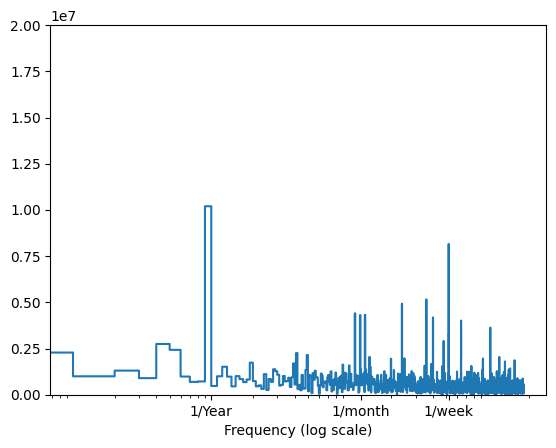

In [69]:
fft = tf.signal.rfft(s_full_total)

f_per_dataset = np.arange(0, len(fft))
n_samples_d = len(s_full_total)
days_per_year = 365
years_per_dataset = n_samples_d/(days_per_year)
f_per_year = f_per_dataset/years_per_dataset

plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 0.2e8)
plt.xticks([1, 12, 52], labels=['1/Year', '1/month', '1/week'])
plt.xlabel('Frequency (log scale)')

We can see, that the frequencies with the highest values are at 1 year and 1 week. This is a very typical behaviour and matched our observations so far further above. The periodicity for month can also be seen but it is not as strong which can be easily explained since month can have 28, 29, 30 or 31 days.  

When we are training our model, we need to encode this information for our model, so it can learn this periodic behaviour. A good way to do this, is by using sin and cosine encoding to not have a non discrete sequence (e.g., days going from 1 to 365 and back to 1, or month going from 1 to 12 and back to 1). This is especially important for deep learning models. Tree based models are typically more robust towards raw cyclical features.

<a name="4.5."></a>
## 4.5. Data cleaning
[Content](#content)

As we could see during the analysis so far, the different counting stations have a similar behaviour overall with a similar distribution and just a different scaling. The mean value of the stations is between ~ 1092  and ~ 6249 . Judging from this,  0.0 -values seem to be very unlikely and appear in the trends to be outliers, that not a single bicycle was counted during a full day. For this reason we will treat all  0.0 -values as outliers and set those to NaN Values. Those values most likely are an error in measurement e.g. caused by road constructions so that the counting stations could not count any number of bicyles.

Also in a Gaussian distribution, about  99.7%  of values fall within 3 times of the standard deviation. Therefore we will consider everything above/below this an outlier and will set those values to NaN as well.

Then we will use the forward fill strategy for imputing the missing NaN values.

IS FORWARD FILL STRATEGY HERE REALLY THE BEST APPROACH? MAYBE DROPPING THOSE ROWNS WOULD BE BEST OR SINCE WE USE THE TOTAL AS OUR TARGET WE DO NOT HAVE A ROW WITH NO VALUES AT ALL.

In [ ]:
# Create a copy of the original dataset
df_cyclist_replaced = df_cyclist.copy()

# Cycle through the columns and calculate for each the mean and standard deviation
# Replace the outliers with np.NAN
# Save the result in new dataframe
for name in df_cyclist.columns:

    mu = df_cyclist.loc[:,name].mean()
    std = df_cyclist.loc[:,name].std()
    mask = (df_cyclist[name] == 0.0) | (df_cyclist[name] > (mu+3*std))

    df_cyclist_replaced.loc[mask, name] = np.NAN

# Use forward fill strategy to fill up missing NaN values
df_cyclist_imputed = df_cyclist_replaced.fillna(method="ffill")

# Check the result
missing_percent(df_cyclist_imputed)

,Absolut missing,% missing
column,,
graf_moltke_straße_ostseite,0,0.0
graf_moltke_straße_westseite,0,0.0
hastedter_bruckenstraße,0,0.0
langemarckstraße_ostseite,0,0.0
langemarckstraße_westseite,0,0.0
osterdeich,0,0.0
radweg_kleine_weser,0,0.0
schwachhauser_ring,0,0.0
wachmannstraße_auswarts_sud,0,0.0


<a name="5"></a>
# 5.&nbsp;Details weather dataset
[Content](#content)

Next, we will have a detailed look on the weather dataset.

In [108]:
def plot_time_series_weather(df):
    """
    Funtion plots a weather feature together with the values of a counting station

    Args:
        df (pandas.DataFrame): the dataset
    """


    def plot_time_series_weather(weather_feature, station):

        data = df

        # Create plotly express figure
        fig = px.line()
        fig.add_scatter(x=data.index, y=data[weather_feature], mode="lines", line=dict(color="blue"), yaxis="y1", name=f"{weather_feature}")
        fig.add_scatter(x=data.index, y=data[station], mode="lines", line=dict(color="red"), yaxis="y2", name=f"{station}")

        # Set layout
        fig.update_layout(
            width=1500,
            title=f"Plotting weather feature '{weather_feature}' against '{station}'",
            xaxis=dict(
                title="Date"
                ),
            yaxis=dict(
                title=f"{weather_feature}",
                color="blue"
                ),
            yaxis2=dict(
                title=f"{station}",
                color="red",
                overlaying="y",
                side="right",
                showgrid=False,
                showticklabels=True
                ),
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="right",
                x=0.99
                ),
            )

        fig.show()

    select_weather_feature = widgets.Dropdown(
        options=df.columns[12:22],
        description='Weather:',
        layout={"width": "550px"},
        disabled=False,
        )

    select_station = widgets.Dropdown(
        options=df.columns[0:12],
        description='Station:',
        layout={"width": "550px"},
        disabled=False,
        )

    interact(plot_time_series_weather, weather_feature=select_weather_feature, station=select_station)

plot_time_series_weather(df_full)

interactive(children=(Dropdown(description='Weather:', layout=Layout(width='550px'), options=('tavg', 'tmin', …

This diagram shows the weather data and a station can be plotted as overlay. For data like temperature a correlation with the counting stations can be seen (seasonal patterns). As expected, the data is very seasonal with e.g., higher temperatures in summer and lower temperatures and snow in winter as well as windy month in autum and winter.

<a name="5.2."></a>
## 5.2. Data cleaning

[Content](#content)


We will use the imputing strategies as discussed in the previous chapter.

**Handling missing `snow` values**

In [ ]:
# Make a copy of dataframe
df_weather_imputed = df_weather.copy()

# Create a mask for filtering
mask = df_weather_imputed.loc[:,"snow"].isna()

# Set all NaN values in column `snow` to 0.0
df_weather_imputed.loc[mask,"snow"] = 0.0

**Handling missing `wdir` values**

For the few missing values of `wdir`, we will use forward fill strategy.

In [ ]:
mask = df_weather_imputed.loc[:,"wdir"].isna()

# Forward fill the missing values of `wdir`
df_weather_imputed.loc[:,"wdir"] = df_weather_imputed.loc[:,"wdir"].fillna(method='ffill')

**Handling missing `wpgt` values**

For the few missing values of `wpgt`, we will use forward fill strategy.

In [ ]:
mask = df_weather_imputed.loc[:,"wpgt"].isna()

# Forward fill the missing values of `wpgt`
df_weather_imputed.loc[:,"wpgt"] = df_weather_imputed.loc[:,"wpgt"].fillna(method='ffill')

In [ ]:
# Check if all missing values have been imputed
missing_percent(df_weather_imputed)

,Absolut missing,% missing
column,,
tavg,0,0.0
tmin,0,0.0
tmax,0,0.0
prcp,0,0.0
snow,0,0.0
wdir,0,0.0
wspd,0,0.0
wpgt,0,0.0
pres,0,0.0


All missing values have been imputed according to above mentioned strategy.

<a name="6"></a>
# 6.&nbsp;Correlation among datasets
[Content](#content)

Now that we looked at the datasets in detail, handled the outliers and imputed missing data, we will have a look on the correlation of the datasets. This will help to determine which features are usefull for training out model.

<a name="6.1."></a>
## 6.1. Correlation of weather features
[Content](#content)

First, we have a look at the correlation of the weather features in the weather dataset. This is useful, because with some machine learning algorithms, multiple features which are highly correlated among each other not be used.

In [ ]:
df_weather_imputed.corr().style.background_gradient(cmap='coolwarm')

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
tavg,1.000000,0.942186,0.977599,0.044068,-0.261730,0.023782,-0.153544,0.015764,-0.007891,0.454294
tmin,0.942186,1.000000,0.869225,0.128015,-0.273831,0.048543,-0.044611,0.077887,-0.101801,0.226506
tmax,0.977599,0.869225,1.000000,0.007292,-0.245963,-0.002197,-0.215312,-0.015538,0.040460,0.576276
prcp,0.044068,0.128015,0.007292,1.000000,-0.020643,0.026167,0.197327,0.313844,-0.335527,-0.246556
snow,-0.261730,-0.273831,-0.245963,-0.020643,1.000000,-0.109049,-0.009500,-0.050085,-0.047045,-0.068034
wdir,0.023782,0.048543,-0.002197,0.026167,-0.109049,1.000000,0.184260,0.211913,0.022532,-0.146209
wspd,-0.153544,-0.044611,-0.215312,0.197327,-0.009500,0.184260,1.000000,0.849023,-0.327510,-0.247364
wpgt,0.015764,0.077887,-0.015538,0.313844,-0.050085,0.211913,0.849023,1.000000,-0.371205,-0.127282
pres,-0.007891,-0.101801,0.040460,-0.335527,-0.047045,0.022532,-0.327510,-0.371205,1.000000,0.265934
tsun,0.454294,0.226506,0.576276,-0.246556,-0.068034,-0.146209,-0.247364,-0.127282,0.265934,1.000000


As we can see, the features `tavg`, `tmin` and `tmax` are very highly correlated. From those features it should be considered to only use one feature with shallow learning algorithms.
Also `wspd` and `wpgt` are highly correlated. Here als well it shoul be considered, to only use one of those features.

<a name="6.2."></a>
## 6.2. Correlation cyclist and weather dataset
[Content](#content)

Next, we will create a joint dataset of `df_cyclists_imputed` and `df_weather_imputed` and also add a column with the sum of all counting stations. This we do to examine the correlations among those two datasets.



In [ ]:
# Calculate new series s_cyclist_total_imputed after imputing of values
s_cyclist_total_imputed = df_cyclist_imputed.loc[:,:].sum(axis=1)
s_cyclist_total_imputed.name = "total"

# Add the pandas series `s_cyclist_total_imputed`, `df_weather_imputed `to the dataframe `df_cyclist_imputed`
# and create new dataframe `df`
df_cyclist_weather_imputed = pd.concat([df_cyclist_imputed, s_cyclist_total_imputed, df_weather_imputed], axis=1)

# Check new dataframe
df_cyclist_weather_imputed.head()

,graf_moltke_straße_ostseite,graf_moltke_straße_westseite,hastedter_bruckenstraße,langemarckstraße_ostseite,langemarckstraße_westseite,osterdeich,radweg_kleine_weser,schwachhauser_ring,wachmannstraße_auswarts_sud,wachmannstraße_einwarts_nord,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,261.0,290.0,381.0,312.0,308.0,870.0,410.0,391.0,514.0,267.0,...,6.9,3.5,9.1,6.9,0.0,233.0,19.4,50.4,1001.8,0
2013-01-02,750.0,876.0,1109.0,1258.0,1120.0,2169.0,1762.0,829.0,1786.0,1456.0,...,5.6,4.2,7.1,1.8,0.0,246.0,20.2,40.0,1017.5,30
2013-01-03,931.0,1015.0,1603.0,1556.0,1480.0,2295.0,2287.0,1196.0,2412.0,2035.0,...,8.6,6.0,10.6,0.9,0.0,257.0,23.8,45.7,1024.5,0
2013-01-04,500.0,587.0,1284.0,703.0,626.0,1640.0,1548.0,1418.0,964.0,702.0,...,8.8,6.8,9.7,0.0,0.0,276.0,25.2,48.2,1029.5,0
2013-01-05,1013.0,1011.0,1284.0,1856.0,1621.0,4128.0,4256.0,3075.0,2065.0,1377.0,...,7.7,6.5,8.6,0.1,0.0,293.0,20.2,41.0,1029.9,0


In [ ]:
# Create empty dataframe
df_corr = pd.DataFrame()

# Loop over dataframe `df_cyclist_weather_imputed` to create correlation columns
for name in df_cyclist_weather_imputed.columns.values[0:13]:

  # Prepare the cols for checking correlation
  cols = np.append(np.array([name]), df_weather_imputed.columns.values)

  # Calculate the correlation for a single station
  # This creates a pandas series object
  arr_corr = df_cyclist_weather_imputed.loc[:,cols].corr()

  # Concatenate each pandas series object with the correlation dataframe
  df_corr = pd.concat([df_corr, arr_corr[name][1:]], axis=1)

# Print and apply a color style
df_corr.style.background_gradient(cmap='coolwarm')

,graf_moltke_straße_ostseite,graf_moltke_straße_westseite,hastedter_bruckenstraße,langemarckstraße_ostseite,langemarckstraße_westseite,osterdeich,radweg_kleine_weser,schwachhauser_ring,wachmannstraße_auswarts_sud,wachmannstraße_einwarts_nord,wilhelm_kaisen_brucke_ost,wilhelm_kaisen_brucke_west,total
tavg,0.326223,0.321210,0.452049,0.361526,0.333588,0.344911,0.446075,0.420372,0.302091,0.236574,0.362167,0.329640,0.394357
tmin,0.270858,0.265515,0.359129,0.298864,0.277710,0.271063,0.362712,0.324335,0.256301,0.194006,0.302320,0.278002,0.322487
tmax,0.338873,0.334815,0.480089,0.374603,0.344821,0.368240,0.467326,0.454247,0.310322,0.247736,0.374197,0.338522,0.412361
prcp,-0.124528,-0.121898,-0.136187,-0.118451,-0.108385,-0.123995,-0.116609,-0.159064,-0.101735,-0.109539,-0.116518,-0.101408,-0.129480
snow,-0.130650,-0.124174,-0.094295,-0.109003,-0.087319,-0.087719,-0.140187,-0.110182,-0.109541,-0.107724,-0.116224,-0.106997,-0.120169
wdir,-0.014862,-0.017768,-0.047279,-0.013009,-0.026970,-0.036285,-0.043446,-0.033137,-0.004500,-0.022878,-0.009726,0.000599,-0.024786
wspd,-0.161588,-0.158163,-0.212615,-0.178526,-0.172103,-0.204240,-0.198695,-0.224422,-0.145859,-0.152817,-0.176145,-0.155837,-0.197519
wpgt,-0.103972,-0.099365,-0.129736,-0.121432,-0.115687,-0.134455,-0.120831,-0.147521,-0.093640,-0.104432,-0.108391,-0.097600,-0.125897
pres,0.097805,0.093654,0.135242,0.105028,0.093917,0.118565,0.111761,0.144668,0.096003,0.097777,0.094755,0.098846,0.117626
tsun,0.254697,0.257475,0.419867,0.272244,0.260603,0.321235,0.379176,0.413276,0.225807,0.186757,0.276029,0.242765,0.326008


The correlation matrix gives us information, which features correlate with the numbers of cyclists. Warm colors indicate a positive correlation and cold colors indicate a negative correlation.

Most correlations are weak, however there is a correlation with `tavg`, `tmin`, `tmax` and `tsun`. Those are clear indicators for good weather and therefore expected.
A weak negative correlation is given for `wspd` which has a stronger correlation than `prcp` and `snow` which is unexpected.
According to the data, rainy and snowy days have not a strong influence on the amount of cyclers in the city.  

The winddirection `wdir` has no correlation.

By this observation, we will later drop the feature `wdir` entirely, as there is no correlation to the amount of cyclers.

<a name="6.3."></a>
## 6.3. Correlation cyclist and holiday dataset
[Content](#content)

Next, we will look at the correlation between cyclist data and holidays

In [ ]:
# Create df_cyclist_holidays_imputed
df_cyclist_holidays_imputed = pd.concat([s_cyclist_total_imputed, df_holidays], axis=1)
df_cyclist_holidays_imputed["holiday"] = df_cyclist_holidays_imputed["holiday"].fillna("None")

# Plot the boxplot
fig = px.box(df_cyclist_holidays_imputed, x="holiday", y="total")

fig.update_layout(title="Data distribution for different holidays")

fig.show()

The diagram clearly shows, that the values for certain holidays follow a certain scheme. E.g., the values for `Neujahr` or `1. Weihnachtstag` have a very small inter quartile range and very short whiskers and therefore only a small range of data. The comparison with `None` holiday clearyl shows the impact of a holiday.

Because of this, we will include those data for our machine learning algorithm.

<a name="6.4."></a>
## 6.4. Correlation cyclist and vacation dataset
[Content](#content)

Next, we will look at the correlation between cyclist data and vacation.

In [ ]:
# Create df_cyclist_holidays_imputed
df_cyclist_vacation_imputed = pd.concat([s_cyclist_total_imputed, df_vacation], axis=1)
df_cyclist_vacation_imputed["vacation"] = df_cyclist_vacation_imputed["vacation"].fillna("None")

# Plot the boxplot
fig = px.box(df_cyclist_vacation_imputed, x="vacation", y="total")

fig.update_layout(title="Data distribution for different vacations")

fig.show()

For vacations, the distribution of data compared to non-vacation is not as clear comapred to holidays. However, also here the trend can be seen that during vacation the overall spread of values is lower (smaller inter quartile range) with less smaller and higher values as well as often smaller median values.

Because of this, we will include those data for our machine learning algorithm.

During model training it could be tested, if just adding one feature with vacation would improve performance compared to adding a feature for every single vacation. This is because the vacations are much less different between each other and one combined feature could reduce the complexity of the model and therefore benefit overall learning performance.

<a name="7"></a>
# 7.&nbsp;Locations of counting stations
[Content](#content)


The following map shows the locations of each counting stations.

In [ ]:
# Center of Bremen
center = (53.0766482, 8.8166905)
m = Map(center=center, zoom=12)

markers = []
length = df_geolocations.shape[0]

# Define the color range and the corresponding values
min_val = df_cyclist_replaced.loc[:,:].sum().min()
max_val = df_cyclist_replaced.loc[:,:].sum().max()

color_range = {'gray': (0, 0.2*max_val), 'green': (0.2*max_val, 0.4*max_val),
               'yellow': (0.4*max_val, 0.6*max_val), 'orange':  (0.6*max_val, 0.8*max_val),
               'red': (0.8*max_val, float('inf'))}

# For every station in the dataframe, add the coordinates to the markers array
for station in df_geolocations.index:

  value = df_cyclist_replaced.loc[:,:].sum()[station]
  for color, range_ in color_range.items():

    if value >= range_[0] and value < range_[1]:

      # Only CircleMarker supports different colors
      markers.append(CircleMarker(location=list(df_geolocations.loc[station,:].values),
                            draggable=False, color=color))
      break

# Add markers to the layer to draw
for marker in markers:
  m.add_layer(marker)

display(m)

Map(center=[53.0766482, 8.8166905], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

The map shows the relative amount of traffic compared to the highest value measured. The coloring code is:

<center>

Color code range

| Color | Range |
| :-- | --: |
| Gray | 0% - 20% |
| Green | 20% - 40% |
| Yellow | 40% - 60% |
| Orange | 60% - 80% |
| Red | 80% - 100% |

</center>

As often in Bremen cyclers do not use the right side of the street but also often drive on the left side, counting stations should be looked at in pairs in case there is one station per each side of the street. This explains for example the huge gap between WilhelmKaisenBrEast and WilhelmKaisenBrWest. If cyclers were to strictly use the right lane, the values on each side would be expected to be much closer together (for both the way and way back).

The highest traffic can be seen on the Wilhelm-Kaisen-Brücke as well as Wachmann Strasse. Those stations lay on the "east-west" connection of the city and connects the west part of the city with the commercial and university part in the east of the city.

Also high traffic can be seen around the area of the "Werdersee" with the stations "Wilhelm-Kaisen-Brücke", "Osterdeich", "Hastedter-Brücken-Strasse" and "Radweg kleine Weser". Those are all stations mainly connecting or leading to bridges to connect both sides of the river with each other.

<a name="8"></a>
# 8. Export of training dataset
[Content](#content)

Lastly, we will export the current datasets with imputed values as one big matrix with all values included, to train the models on.

In [ ]:
# Create dataset to export

# Create a joint dataset with `s_weekdays`, `df_cyclist_imputed`, `s_cyclist_total_imputed`,
# `df_weather_imputed`, `df_holidays` and `df_vacation`
df = pd.concat([s_weekdays, df_cyclist_imputed, s_cyclist_total_imputed, df_weather_imputed, df_holidays, df_vacation], axis=1)

# Check dataframe
df.head()

,weekday,graf_moltke_straße_ostseite,graf_moltke_straße_westseite,hastedter_bruckenstraße,langemarckstraße_ostseite,langemarckstraße_westseite,osterdeich,radweg_kleine_weser,schwachhauser_ring,wachmannstraße_auswarts_sud,...,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,holiday,vacation
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,261.0,290.0,381.0,312.0,308.0,870.0,410.0,391.0,514.0,...,9.1,6.9,0.0,233.0,19.4,50.4,1001.8,0,Neujahr,Weihnachtsferien
2013-01-02,2,750.0,876.0,1109.0,1258.0,1120.0,2169.0,1762.0,829.0,1786.0,...,7.1,1.8,0.0,246.0,20.2,40.0,1017.5,30,NaN,Weihnachtsferien
2013-01-03,3,931.0,1015.0,1603.0,1556.0,1480.0,2295.0,2287.0,1196.0,2412.0,...,10.6,0.9,0.0,257.0,23.8,45.7,1024.5,0,NaN,Weihnachtsferien
2013-01-04,4,500.0,587.0,1284.0,703.0,626.0,1640.0,1548.0,1418.0,964.0,...,9.7,0.0,0.0,276.0,25.2,48.2,1029.5,0,NaN,Weihnachtsferien
2013-01-05,5,1013.0,1011.0,1284.0,1856.0,1621.0,4128.0,4256.0,3075.0,2065.0,...,8.6,0.1,0.0,293.0,20.2,41.0,1029.9,0,NaN,Weihnachtsferien


In [ ]:
date = datetime.date.today()

file_name = f"{date}" + "_df_full.csv"

df.to_csv(file_name)
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a name="9"></a>
#9.&nbsp;Summary and next steps
[Content](#content)


**Summary:**

In this notebook we have seen, that all the counting stations have a similar behaviour, are Gaussian and mainly just differenciate by the amount (scaling) of the value (number of cyclists). This means, that any properly trained ML algorithm should be capable of forecasting all the stations with similar accuarcy. Also we saw, that the COVID pandemic did not have a measurable impact on the overall amount. Therfore we do not have to take special actions during the training of our model for this period of time.

To prepare the dataset, we eliminated the outliers like 0-Values and values that are greater than 3 times the standard deviation. Then we imputed those values with the forward fill strategy.

For the weather dataset we imputed the missing `snow` values after careful consideration with 0-values and just forward fill strategy on `wdir` and `wpgt`.

Regarding the correlation, the main features to consider are `tmin`, `tmax`, `tavg` and `tsun`. The feature `wdir` is a feature that we could propably drop entirely, since there is no correlation. When training a machine learning model, we need to consider to not use features that are highly correlated among each other, if the algorithm is sensitive to it.

The day of the week has also an impact on the values. The highest count can be observed from Monday to Friday and from there declining until Sunday. From there on the values rise again for the beginning of the next week.

Certain holidays and vacations have a strong influence on the data and will therefore be used for our machine learning model.

**Next steps:**

With the gathered information, we will try to fit different models to the data. The models we will try are

* Autoregressive Integrated Moving Average (ARIMA)
* XGBoost
* Multilayer Perceptron
* Recurrent Neural Networks (RNNs)

The models will be trained in the notebook [3_Model_Training](https://github.com/Rudinius/Bike_usage_Bremen/blob/cd6e45dab87d344af82cc318fd12a9d2e09b9cc4/3_Model_Training.ipynb).